# Normalization of the hypothesis

In this notebook we demonstrate the properties of normalization of the hypothesis graph.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hypotest.setup_hypothgraph import sample_graphs

INFO:rdflib:RDFLib Version: 4.2.1


In [3]:
hypothgraph = sample_graphs.sample_unnormalized()

In [4]:
from hypotest.graph_generation import hypoth_conf
s, t = hypoth_conf.generate_rich_endpoints(hypothgraph, min_nb_paths=6)

In [5]:
conf = hypoth_conf.Hypoth_Conf(s, t, [])

## Unnormalized hypothesis graph looks as follows

In [6]:
from hypotest.io import write_dot
from IPython.display import Image

In [7]:
import os
path_to_figures = './images/normalization'

In [8]:
unnormalized_dot = os.path.join(path_to_figures, 'unnormalized.dot')
unnormalized_png = os.path.join(path_to_figures, 'unnormalized.png')

with open(unnormalized_dot, 'w') as f:
    write_dot.hypothgraph_to_dot(hypothgraph, conf, stream=f)

In [9]:
!dot -Tpng -o $unnormalized_png $unnormalized_dot

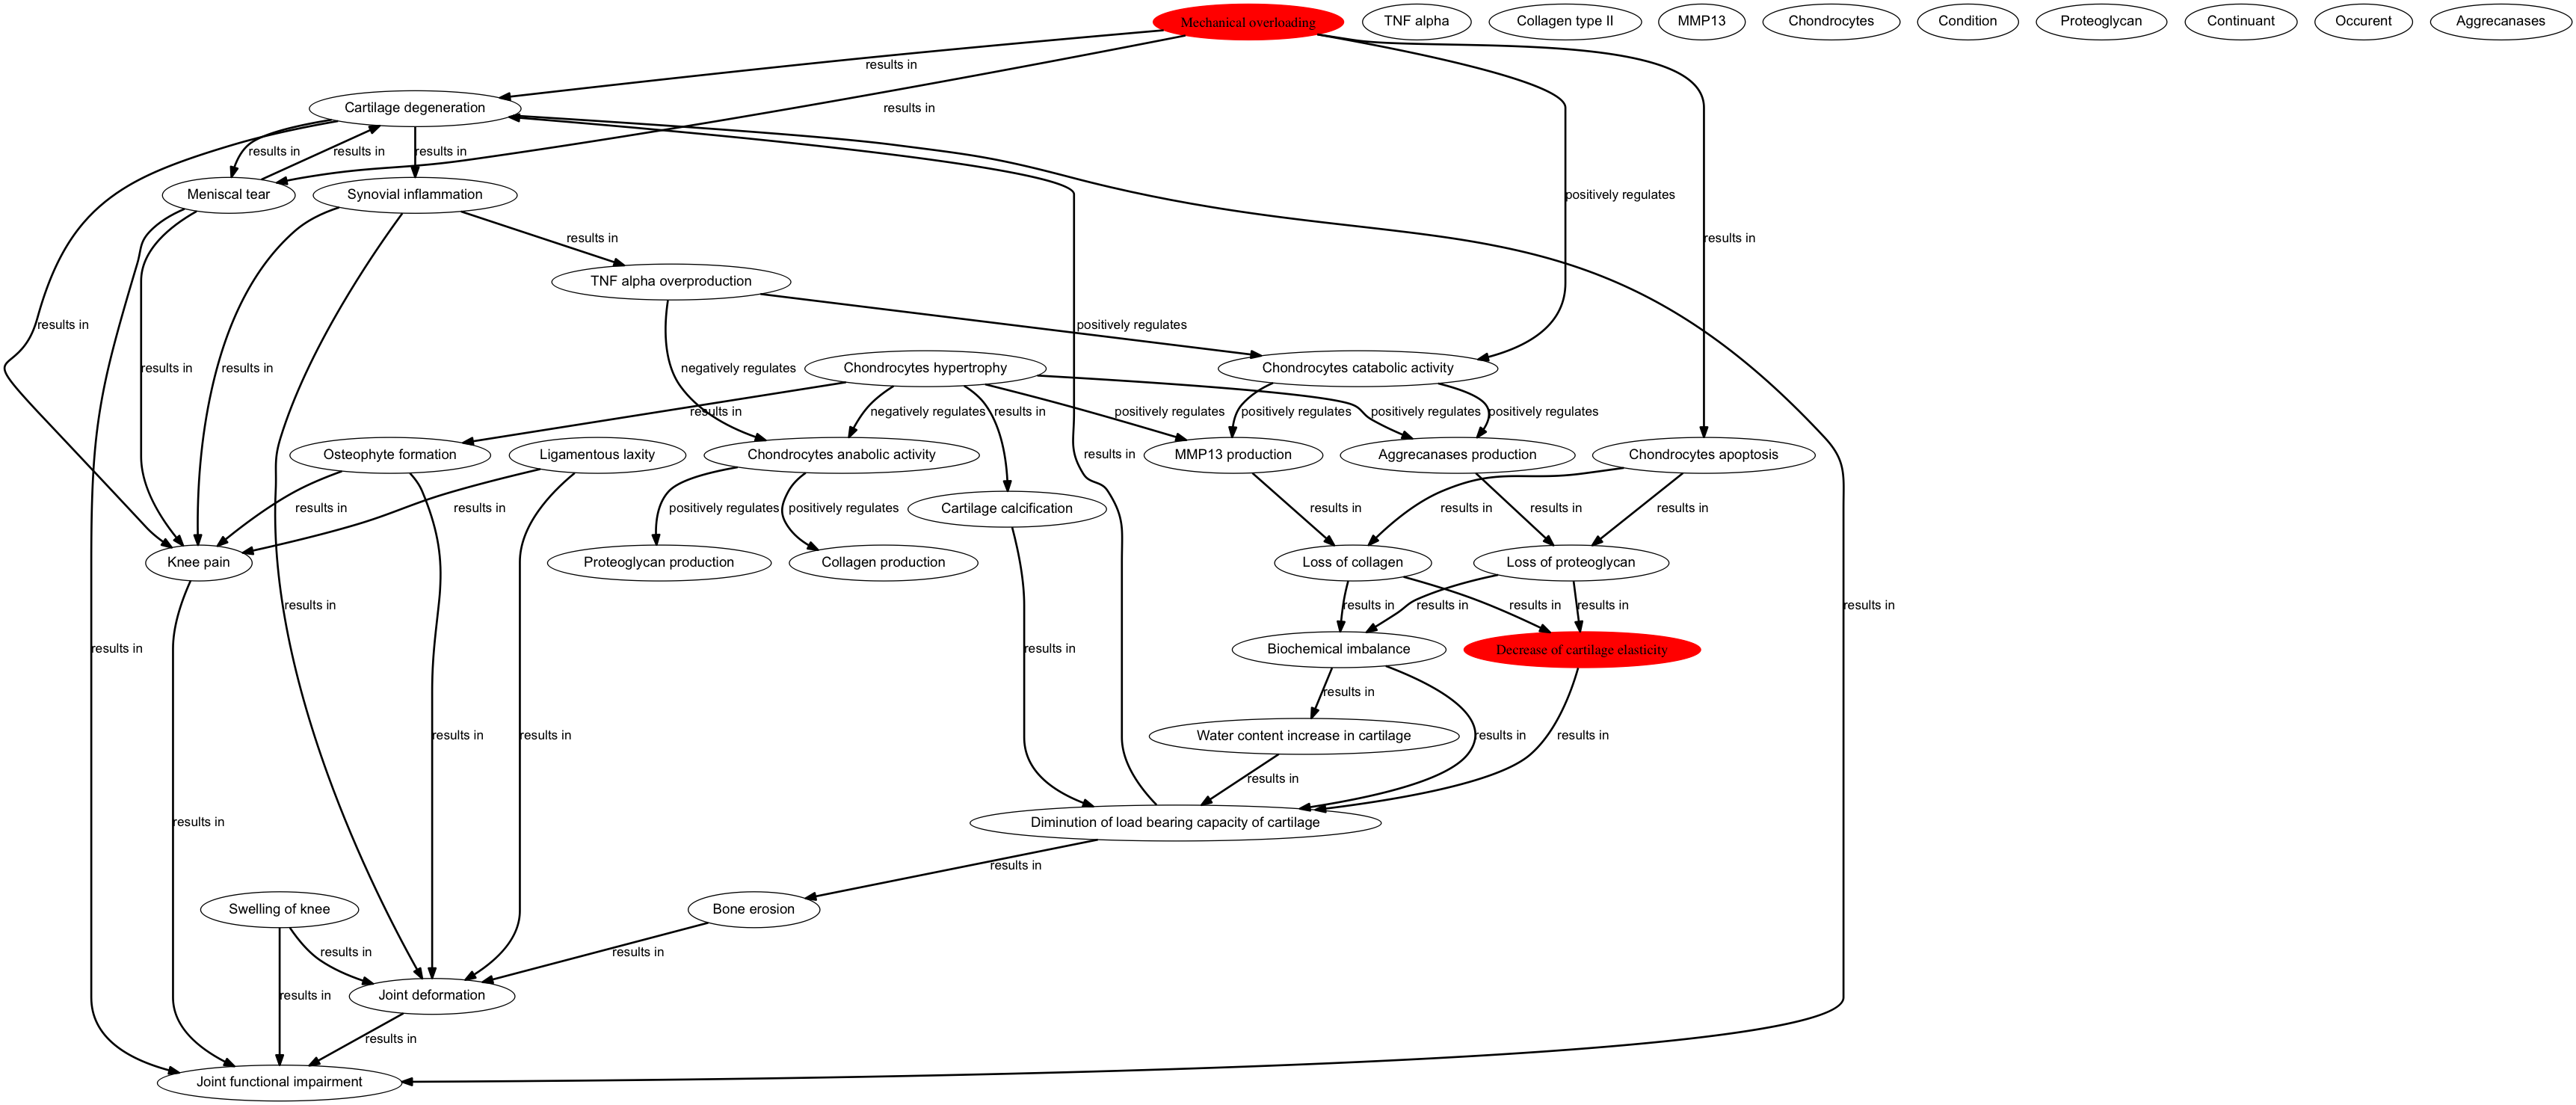

In [10]:
Image(unnormalized_png)

## Normalize the hypothesis graph

In [11]:
from hypotest.graph_mutation import normalize_hypothgraph

In [12]:
normalized, normalized_nodes = normalize_hypothgraph.normalize_hypothgraph(hypothgraph)

### Change hypothesis configuration

In [13]:
new_s, new_t = hypoth_conf.generate_rich_endpoints(normalized, min_nb_paths=6)

In [14]:
new_conf = hypoth_conf.Hypoth_Conf(new_s, new_t, [])

In [15]:
normalized_dot = os.path.join(path_to_figures, 'normalized.dot')
normalized_png = os.path.join(path_to_figures, 'normalized.png')

with open(normalized_dot, 'w') as f:
    write_dot.hypothgraph_to_dot(normalized, new_conf, stream=f)

In [16]:
!dot -Tpng -o $normalized_png $normalized_dot

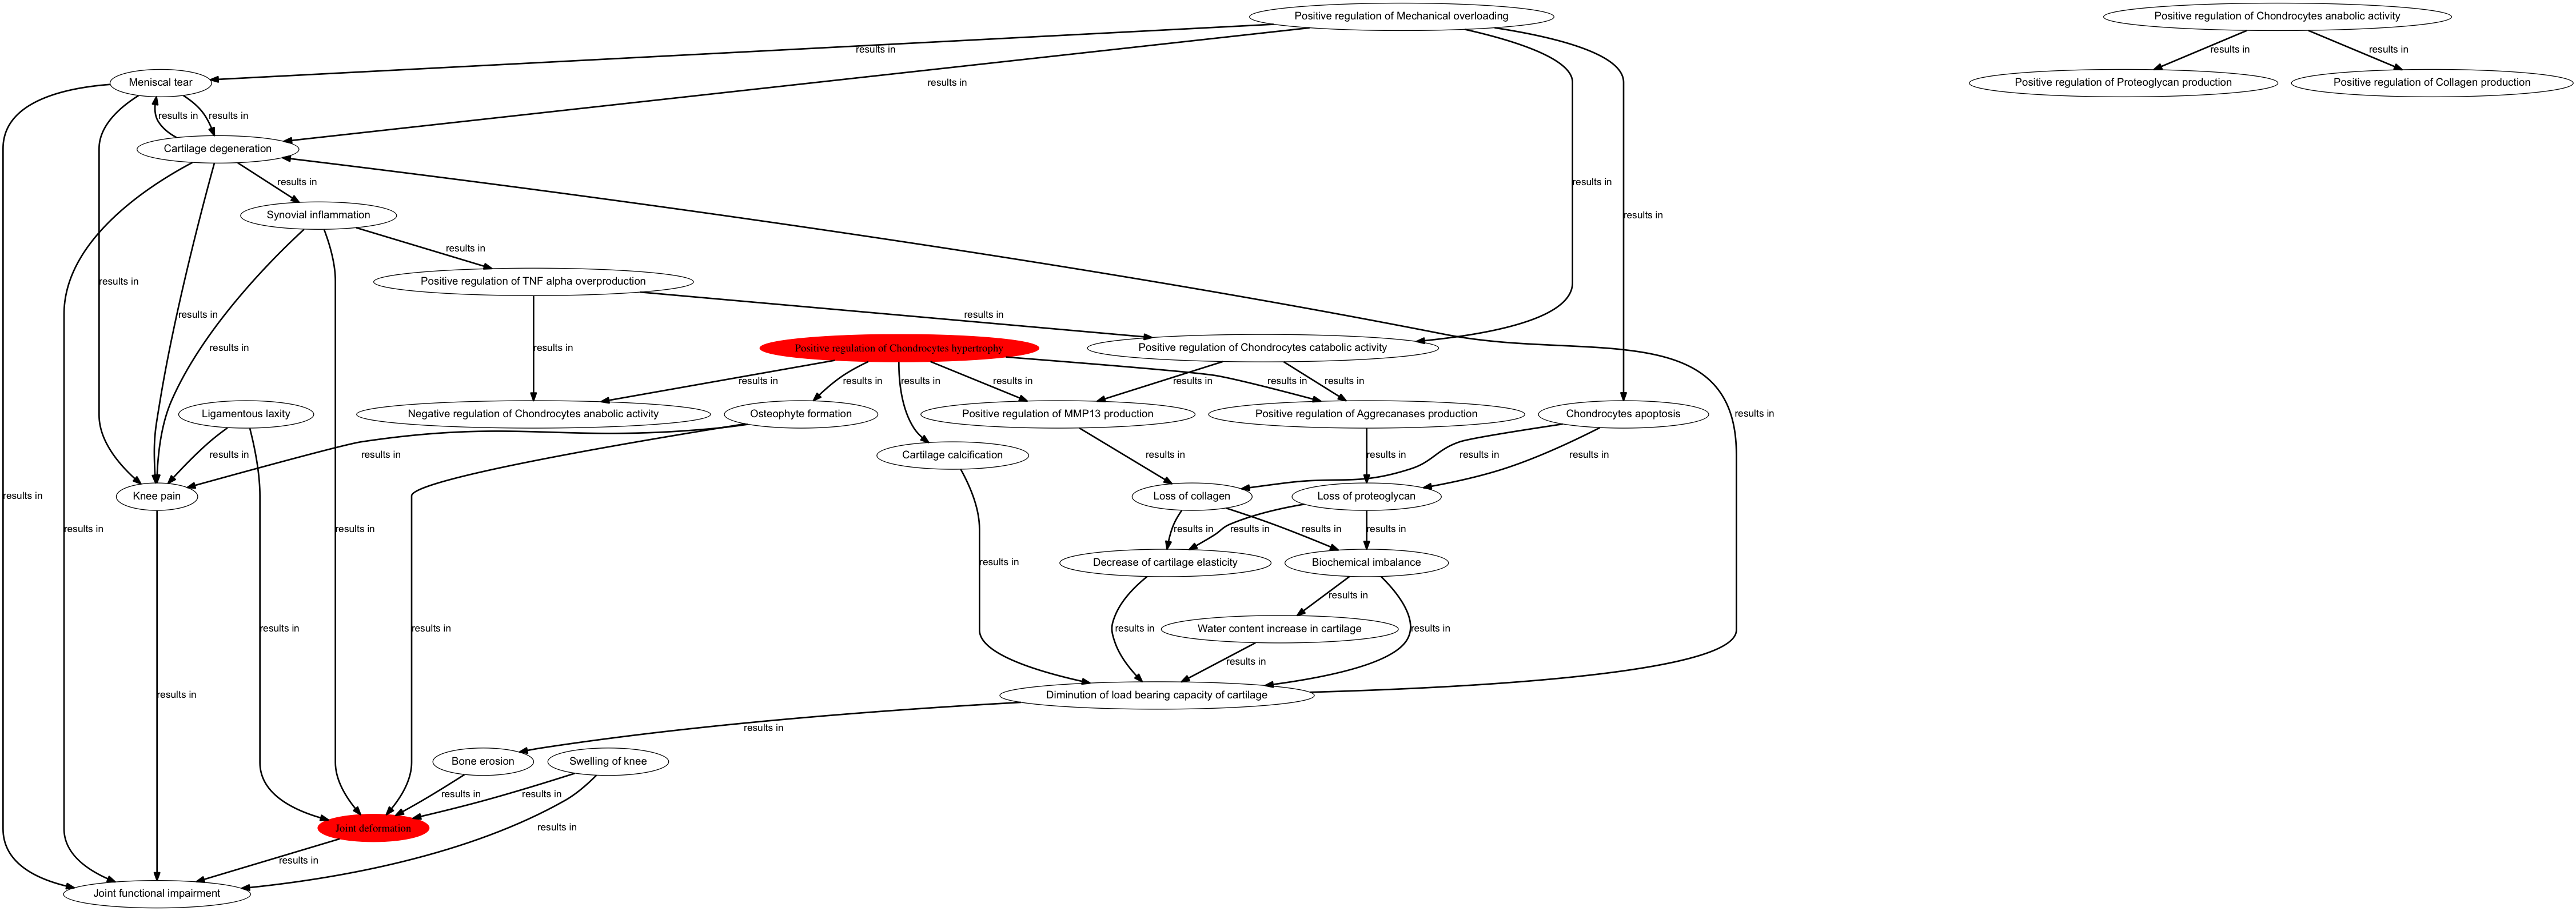

In [17]:
Image(normalized_png)